I check for the files

In [1]:
!ls -l

total 4616
-rw-r--r--  1 gabi  staff   409148 Jun 22 23:01 Understanding Data.ipynb
-rw-r-----@ 1 gabi  staff  1932080 Jun 22 13:51 curves.npy
-rw-r-----@ 1 gabi  staff    19400 Jun 22 13:51 rmsds.npy


In [53]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('SevPRumWqsE')

In [54]:
YouTubeVideo('mPoshDWJucI')

In [1]:
import numpy as np

In [2]:
# load arrays
curves = np.load('curves.npy')
rmsds = np.load('rmsds.npy')

Observe how the arrays are to understand them better

In [3]:
curves.shape, curves.size, curves.dtype

((2415, 100), 241500, dtype('float64'))

In [4]:
rmsds.shape, rmsds.size, rmsds.dtype

((2415,), 2415, dtype('float64'))

In [5]:
curves[0].max(), curves.min(), curves.mean()

(11961.0, -187533.60000000001, 45210.422315113872)

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt

We know that every curve, is the total of distances measured

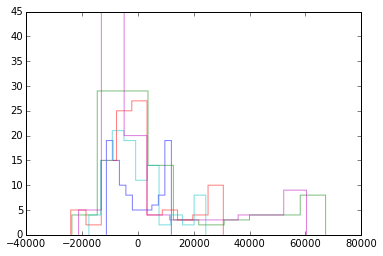

In [15]:
for protein in curves[:5]:
    plt.hist(protein, alpha=0.5, histtype='step')

Most repetead values are between -20.000 and 20.000

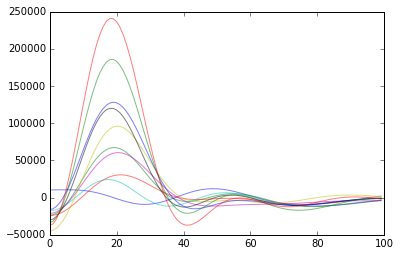

In [16]:
for protein in curves[:10]:
    plt.plot(protein, alpha=0.5)

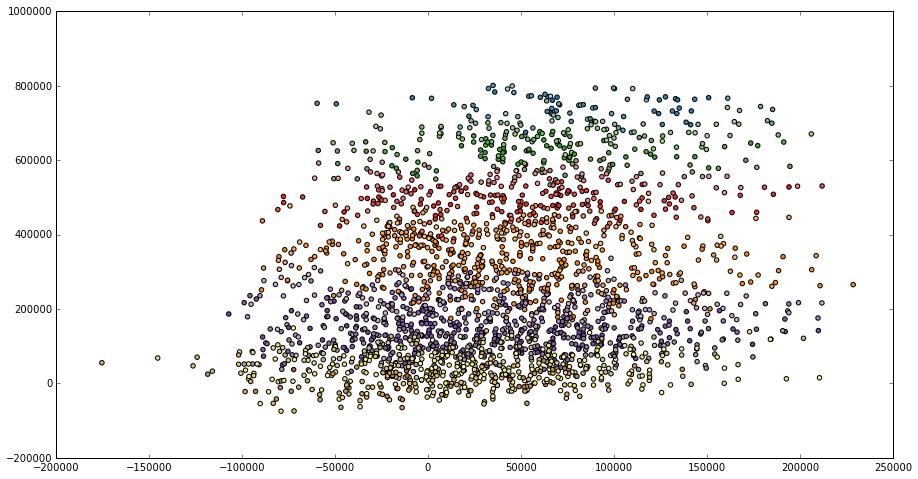

In [43]:
fig_scatter_20 = plt.figure(figsize=(15, 8))
plt.scatter(curves[:, 0], curves[:, 20], c=rmsds, cmap=plt.cm.Paired_r)

Biggest variations can be found on the first 40 values

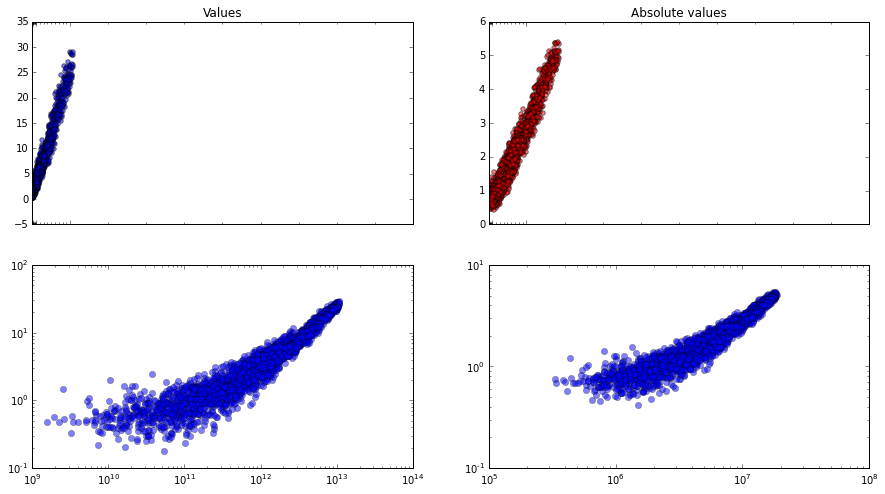

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')

fig.set_figwidth(15)
fig.set_figheight(8)

ax1.set_title('Values')
ax1.scatter(np.sum(curves**2, axis=1), rmsds**2, marker='o', c='b', alpha=0.5)

ax2.set_title('Absolute values')
ax2.scatter(np.sum(np.abs(curves), axis=1), rmsds, marker='o', c='r', alpha=0.5)

#logaritmic scaling
ax3.loglog(np.sum(curves**2, axis=1), rmsds**2, 'o', alpha=0.5)
ax4.loglog(np.sum(np.abs(curves), axis=1), rmsds, 'o', alpha=0.5)

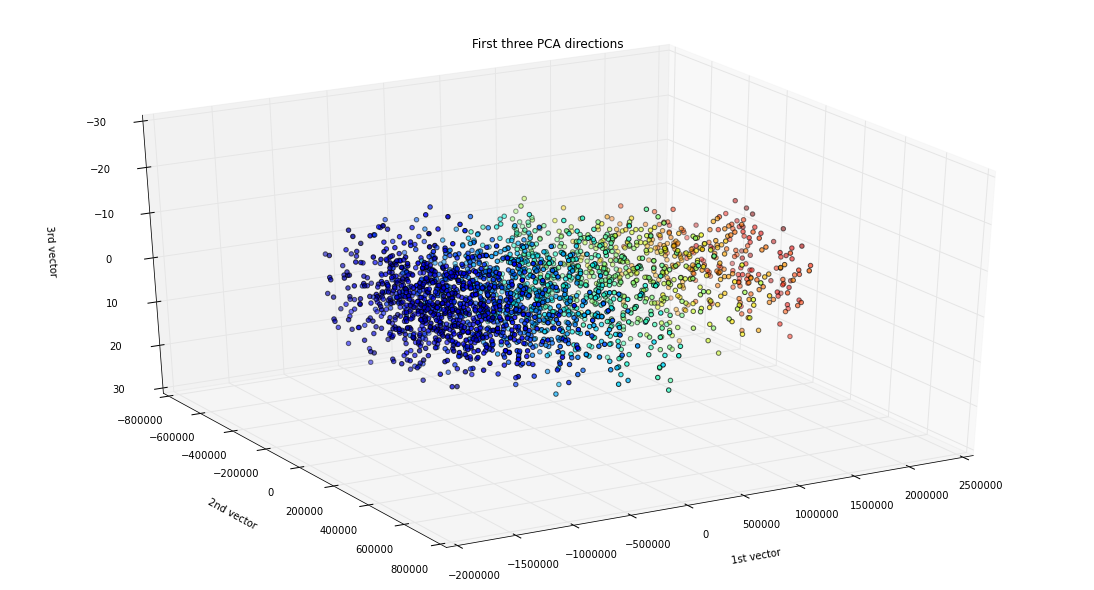

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# To getter a better understanding of interaction of the dimensions
fig = plt.figure(1, figsize=(15, 8))
ax = Axes3D(fig, elev=-150, azim=80)
X_reduced = PCA(n_components=100).fit_transform(curves)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 20], c=rmsds)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st vector")
ax.set_ylabel("2nd vector")
ax.set_zlabel("3rd vector")